In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from pathlib import Path

In [2]:
df1 = pd.read_csv('monthly_201605_000000000000.csv.gz')

In [7]:
df1

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
0,False,yellow,1,93,普通車,115655.0,35.584315,139.735000,3263,15,15,2016-05-22 00:00:00,実車
1,True,yellow,1,225,普通車,305690.0,35.661260,139.723070,3412,27,27,2016-05-22 00:00:00,空車
2,False,yellow,2,45,普通車,2412386.0,35.629876,139.727613,520,0,0,2016-05-22 00:00:00,空車
3,False,green,6,45,普通車,627158.0,35.654604,139.706205,398,21,30,2016-05-22 00:00:00,空車
4,True,black,6,45,黒タク,517482.0,35.693338,139.703595,564,0,0,2016-05-22 00:00:00,空車
5,True,black,6,360,黒タク,626051.0,35.611447,139.669927,412,31,40,2016-05-22 00:00:01,空車
6,True,green,6,45,普通車,609248.0,35.706206,139.842805,415,0,0,2016-05-22 00:00:01,空車
7,True,yellow,3,225,普通車,140373.0,35.635230,139.664440,3147,10,19,2016-05-22 00:00:01,空車
8,True,green,6,225,普通車,623686.0,35.681030,139.780831,451,0,0,2016-05-22 00:00:02,空車
9,True,black,3,315,黒タク,39712.0,35.680616,139.786956,397,30,39,2016-05-22 00:00:02,空車


In [8]:
df1.to_pickle('alldata.pickle')

In [74]:
df1.shape

(8834613, 13)

In [9]:
df = pd.read_pickle('alldata.pickle')

In [2]:
df = pd.read_csv("sample_1pml_1570512675146.csv")

In [3]:
df.head()
#可能であれば，Latitude&Longtitudeから郵便番号なり，市外局番，最寄り駅を取得したい！！

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
0,False,yellow,1,248,普通車,167007,35.690970,139.754970,4285,75,75.0,2016-06-28 20:43:20,実車
1,False,black,1,59,黒タク,40634,35.684328,139.785427,454,55,55.0,2016-10-19 03:31:41,実車
2,False,black,1,88,黒タク,40634,35.695951,139.756240,1544,41,41.0,2016-06-03 11:19:25,実車
3,False,yellow,1,339,普通車,115905,35.673969,139.723400,3355,54,54.0,2016-12-07 17:28:46,実車
4,False,black,1,101,黒タク,40634,35.694710,139.785870,1544,47,47.0,2016-10-31 20:35:05,実車


In [4]:
#df['StatusTime'][0]

'2016-06-28 20:43:20'

In [5]:
#df['Time'] = pd.to_datetime(df['StatusTime'])
#df['hour'] = df['Time'].dt.hour

In [6]:
#df["date"]=df.loc[:,'Time'].dt.strftime("%Y-%m-%d")

In [7]:
#df.head(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date
0,False,yellow,1,248,普通車,167007,35.690970,139.754970,4285,75,75.0,2016-06-28 20:43:20,実車,2016-06-28 20:43:20,20,2016-06-28
1,False,black,1,59,黒タク,40634,35.684328,139.785427,454,55,55.0,2016-10-19 03:31:41,実車,2016-10-19 03:31:41,3,2016-10-19
2,False,black,1,88,黒タク,40634,35.695951,139.756240,1544,41,41.0,2016-06-03 11:19:25,実車,2016-06-03 11:19:25,11,2016-06-03
3,False,yellow,1,339,普通車,115905,35.673969,139.723400,3355,54,54.0,2016-12-07 17:28:46,実車,2016-12-07 17:28:46,17,2016-12-07
4,False,black,1,101,黒タク,40634,35.694710,139.785870,1544,47,47.0,2016-10-31 20:35:05,実車,2016-10-31 20:35:05,20,2016-10-31
5,False,yellow,1,54,普通車,115905,35.642862,140.079090,3355,90,90.0,2016-12-13 08:43:28,実車,2016-12-13 08:43:28,8,2016-12-13
6,True,yellow,1,195,普通車,115905,35.683940,139.774450,3301,44,44.0,2016-06-25 08:19:45,空車,2016-06-25 08:19:45,8,2016-06-25
7,False,black,8,172,黒タク,9044,35.647767,139.802700,1725,33,33.0,2016-10-21 08:30:06,離れ,2016-10-21 08:30:06,8,2016-10-21
8,False,yellow,1,294,普通車,112742,35.687003,139.725920,3180,44,44.0,2016-06-16 19:01:23,実車,2016-06-16 19:01:23,19,2016-06-16
9,False,yellow,1,318,普通車,140155,35.655963,139.861667,3841,1,1.0,2016-10-03 19:24:05,回送,2016-10-03 19:24:05,19,2016-10-03


In [8]:
gp_hour = df.groupby(df['Time'].dt.hour).size()
gp_hour

Time
0     505595
1     506042
2     452044
3     358147
4     239601
5     149496
6     170330
7     268762
8     410740
9     471946
10    464384
11    450489
12    442003
13    429659
14    420858
15    427924
16    423488
17    421789
18    440859
19    451583
20    444792
21    465127
22    478960
23    490230
dtype: int64

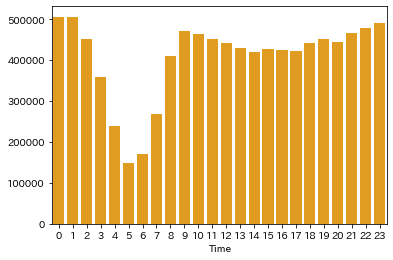

In [9]:
sns.barplot(gp_hour.index, gp_hour.values, color = 'orange')

# Week number
['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
が0, 1, 2, ,3, 4, 5, 6

df['Week_num'] = df['Time'].dt.dayofweek
a = df.groupby(df['Week_num']).size()
order= ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(order, a.values)

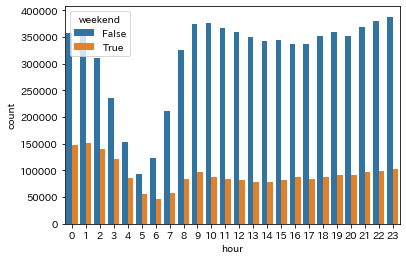

In [11]:
df['weekend'] = (df['Week_num'] == 5) | (df['Week_num'] == 6)
sns.countplot(x="hour", hue="weekend",data=df)

In [12]:
b = sum(df['weekend'] == False)
c= sum(df['weekend'] == True)
b,c

(7562236, 2222612)

In [13]:
d = df.groupby([df['weekend'], df['hour']]).size()
weekday_ratio = d.values[:24]/b
weekend_ratio = d.values[24:]/c

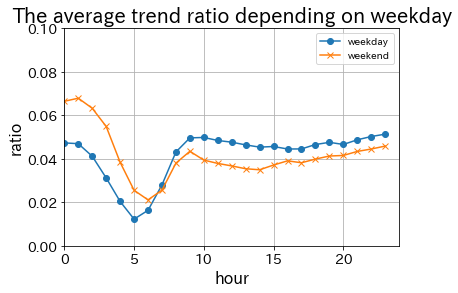

In [14]:
x_datas = range(0, 24)
plt.plot(x_datas, weekday_ratio, marker = 'o',label = 'weekday')
plt.plot(x_datas, weekend_ratio, marker = 'x',label = 'weekend')

#plt.xticks(x_hours, months)
plt.xlim(0, 24)
plt.ylim(0, 0.1) 

plt.title('The average trend ratio depending on weekday', fontsize = 20)
plt.xlabel('hour', fontsize = 16)
plt.ylabel('ratio', fontsize = 16)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [15]:
all_count = df.size
adicts={}
for i in range(7):
    #count = sum(df['Week_num']==i)
    a = df[df['Week_num']==i]
    gp=a.groupby(a['hour']).size()
    adicts[i] = gp/all_count
adicts[6]


hour
0     0.000347
1     0.000353
2     0.000319
3     0.000273
4     0.000188
5     0.000145
6     0.000132
7     0.000147
8     0.000209
9     0.000245
10    0.000217
11    0.000202
12    0.000190
13    0.000187
14    0.000185
15    0.000190
16    0.000206
17    0.000212
18    0.000224
19    0.000229
20    0.000233
21    0.000242
22    0.000249
23    0.000247
dtype: float64

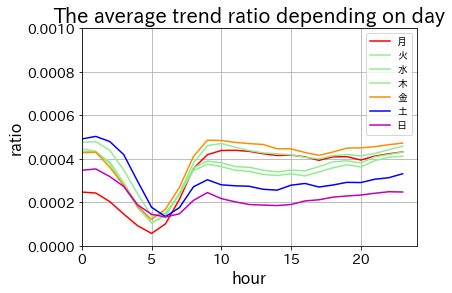

In [16]:
alist=["火","水","木"]
k=0
for i in range(7):
    if i == 0:
        plt.plot(x_datas, adicts[i],color = "r",label = "月")
    elif i == 5:
        plt.plot(x_datas, adicts[i],color = "b",label = "土")
    elif i == 6:
        plt.plot(x_datas, adicts[i],color = "m",label = "日")
    elif i == 4:
        plt.plot(x_datas, adicts[i],color = "darkorange",label = "金")
    else:
        plt.plot(x_datas, adicts[i],color = "lightgreen",label = alist[k])
        k+=1
#plt.xticks(x_hours, months)
plt.xlim(0, 24)
plt.ylim(0, 0.001) 

plt.title('The average trend ratio depending on day', fontsize = 20)
plt.xlabel('hour', fontsize = 16)
plt.ylabel('ratio', fontsize = 16)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [17]:
df.size

176127264

深夜から早朝にかけて週末と平日で差があるかも

In [18]:
df.sample(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend
8586291,True,green,6,180,普通車,380055,35.559572,139.695730,700,41,50.0,2016-12-28 07:00:52,空車,2016-12-28 07:00:52,7,2016-12-28,2,False
5505560,False,green,6,180,普通車,101501,35.664400,139.724453,520,0,0.0,2017-06-11 20:30:17,休憩,2017-06-11 20:30:17,20,2017-06-11,6,True
6042555,False,green,6,45,普通車,101501,35.647303,139.757412,520,11,20.0,2016-07-14 23:40:32,割増,2016-07-14 23:40:32,23,2016-07-14,3,False
538978,True,black,7,360,黒タク,3265,35.643122,139.752443,1153,18,18.0,2017-05-08 10:53:10,空車,2017-05-08 10:53:10,10,2017-05-08,0,False
4419319,False,yellow,3,225,普通車,110015,35.702781,139.790038,2341,10,19.0,2016-09-30 19:25:52,休憩,2016-09-30 19:25:52,19,2016-09-30,4,False
654641,False,yellow,1,172,普通車,115905,35.625165,139.739550,3355,44,44.0,2017-05-10 21:02:17,空車,2017-05-10 21:02:17,21,2017-05-10,2,False
9391016,False,green,6,315,普通車,390401,35.605474,139.635094,991,51,60.0,2016-10-30 14:09:41,空車,2016-10-30 14:09:41,14,2016-10-30,6,True
421103,False,black,1,70,黒タク,42242,35.621480,139.749420,210,0,0.0,2017-05-07 10:21:22,回送,2017-05-07 10:21:22,10,2017-05-07,6,True
3535423,False,yellow,1,38,普通車,166749,35.807980,139.625540,4254,95,95.0,2016-06-02 02:21:50,回送,2016-06-02 02:21:50,2,2016-06-02,3,False
7352787,False,green,6,45,普通車,100925,35.670311,139.744854,1076,0,0.0,2016-07-19 19:45:28,空車,2016-07-19 19:45:28,19,2016-07-19,1,False


In [19]:
a=df[(df["DriverNumber"]== 3265)&(df["date"]=="2018-03-24")]
a[a["VehicleStatus"]=="迎車"]

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend
229882,False,black,7,90,黒タク,3265,35.674876,139.826717,1153,18,18.0,2018-03-24 07:06:58,迎車,2018-03-24 07:06:58,7,2018-03-24,5,True
543944,False,black,7,45,黒タク,3265,35.620360,139.777146,1153,18,18.0,2018-03-24 07:49:32,迎車,2018-03-24 07:49:32,7,2018-03-24,5,True
545561,False,black,7,90,黒タク,3265,35.676660,139.824833,1153,18,18.0,2018-03-24 07:05:27,迎車,2018-03-24 07:05:27,7,2018-03-24,5,True
861520,False,black,7,225,黒タク,3265,35.620709,139.774050,1153,18,18.0,2018-03-24 07:38:33,迎車,2018-03-24 07:38:33,7,2018-03-24,5,True
870301,False,black,7,180,黒タク,3265,35.659287,139.824025,1153,18,18.0,2018-03-24 07:09:58,迎車,2018-03-24 07:09:58,7,2018-03-24,5,True
876470,False,black,7,180,黒タク,3265,35.654634,139.824446,1153,18,18.0,2018-03-24 07:12:00,迎車,2018-03-24 07:12:00,7,2018-03-24,5,True
886056,False,black,7,225,黒タク,3265,35.665111,139.824625,1153,18,18.0,2018-03-24 07:08:53,迎車,2018-03-24 07:08:53,7,2018-03-24,5,True
1164274,False,black,7,180,黒タク,3265,35.661249,139.823880,1153,18,18.0,2018-03-24 07:09:34,迎車,2018-03-24 07:09:34,7,2018-03-24,5,True
1170634,False,black,7,225,黒タク,3265,35.640360,139.803471,1153,18,18.0,2018-03-24 07:18:12,迎車,2018-03-24 07:18:12,7,2018-03-24,5,True
1173142,False,black,7,225,黒タク,3265,35.638194,139.799121,1153,18,18.0,2018-03-24 07:19:57,迎車,2018-03-24 07:19:57,7,2018-03-24,5,True


#driver numbeer が5131159の人の日別空車率

In [20]:
dr=df[df["DriverNumber"]==5131159]
dr_sorted_ratio = dr.groupby(dr["date"]).apply(lambda x:x[x["VehicleStatus"]=="空車"].size/x.size).sort_values(ascending =False)

In [21]:
dr_sorted_ratio

date
2017-04-05    0.817259
2017-06-04    0.811828
2017-07-02    0.790850
2017-03-08    0.724638
2018-03-18    0.722222
2017-02-04    0.695431
2016-06-09    0.693989
2016-09-11    0.689815
2017-12-25    0.687500
2017-02-24    0.681481
2016-06-17    0.681250
2016-07-25    0.679245
2016-08-20    0.674556
2016-08-18    0.674419
2018-02-27    0.662252
2016-09-25    0.653846
2016-09-29    0.651982
2017-08-31    0.650909
2016-12-08    0.647059
2017-07-22    0.642857
2017-03-24    0.631902
2017-06-12    0.631579
2017-06-16    0.630952
2017-02-08    0.626943
2016-11-20    0.615741
2016-05-12    0.615079
2017-03-27    0.612903
2016-09-17    0.600000
2016-08-16    0.584699
2017-12-29    0.576355
                ...   
2016-05-28    0.256705
2017-04-13    0.256637
2016-09-20    0.256188
2018-02-07    0.248120
2016-07-03    0.245033
2017-02-06    0.244444
2016-08-19    0.234839
2016-07-14    0.233333
2016-04-05    0.227273
2017-09-07    0.227034
2017-06-28    0.219124
2016-10-29    0.212500
2017-0

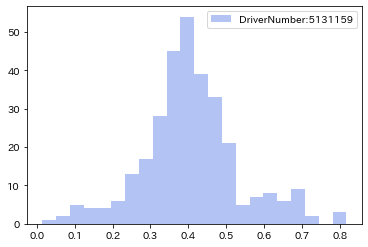

In [22]:
sns.distplot(
    dr_sorted_ratio, color='royalblue', label='DriverNumber:5131159',kde=False)
plt.legend()
plt.show()

In [23]:
dr_sort = dr.sort_values(by=['StatusTime'])
dr_sort["VehicleStatus"].unique()

array(['空車', '休憩', '実車', '迎車'], dtype=object)

In [24]:
a = ((dr_sort["VehicleStatus"]== "実車").values).astype(np.int)
dif1_pick = a[1:]-a[:-1]
dif1_pick = np.append(dif1_pick, 0)
dif2_pick = np.append(a[2:]-a[:-2], [0,0])
dif_pick = dif1_pick+dif2_pick
#pick up する位置
dr_sort["pick"]=(dif_pick == 2).astype(np.int)
dr_sort
#np.count_nonzero(alist == 1), np.count_nonzero(alist == -1),np.count_nonzero(alist == 0)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,2016-04-01 08:12:31,8,2016-04-01,4,False,0
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01,4,False,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01,4,False,0
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,2016-04-01 08:15:03,8,2016-04-01,4,False,0
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,2016-04-01 08:15:31,8,2016-04-01,4,False,0
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,2016-04-01 08:15:58,8,2016-04-01,4,False,0
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,2016-04-01 08:16:50,8,2016-04-01,4,False,0
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,2016-04-01 08:18:54,8,2016-04-01,4,False,0
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,2016-04-01 08:19:45,8,2016-04-01,4,False,0
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,2016-04-01 08:20:10,8,2016-04-01,4,False,0


In [25]:
dr_sort[dr_sort['StatusTime'].str.contains('2016-04-01 08:3')]

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
9320317,False,black,3,225,黒タク,5131159,35.714946,139.808841,5480,30,39.0,2016-04-01 08:30:18,休憩,2016-04-01 08:30:18,8,2016-04-01,4,False,1
3182826,False,black,3,225,黒タク,5131159,35.713724,139.807036,5480,20,29.0,2016-04-01 08:31:31,実車,2016-04-01 08:31:31,8,2016-04-01,4,False,0
5208777,False,black,3,180,黒タク,5131159,35.710252,139.804231,5480,0,9.0,2016-04-01 08:33:31,実車,2016-04-01 08:33:31,8,2016-04-01,4,False,0
2712807,False,black,3,225,黒タク,5131159,35.709697,139.799842,5480,0,9.0,2016-04-01 08:35:31,実車,2016-04-01 08:35:31,8,2016-04-01,4,False,0
4841701,False,black,3,270,黒タク,5131159,35.711224,139.793398,5480,40,49.0,2016-04-01 08:36:50,実車,2016-04-01 08:36:50,8,2016-04-01,4,False,0
1122388,False,black,3,180,黒タク,5131159,35.710613,139.791815,5480,0,9.0,2016-04-01 08:38:51,実車,2016-04-01 08:38:51,8,2016-04-01,4,False,0
3681821,True,black,3,180,黒タク,5131159,35.710141,139.791648,5480,0,9.0,2016-04-01 08:39:41,空車,2016-04-01 08:39:41,8,2016-04-01,4,False,0


In [26]:
dif2_take = np.append(a[2:]-a[:-2], 0)
dif2_take = np.append(0,dif2_take)
dif_take = dif1_pick+dif2_take
#get out する位置
#dr_sort[dif_take == -2]
dr_sort["pick"]=dr_sort["pick"]-(dif_take == -2).astype(np.int)
dr_sort

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,2016-04-01 08:12:31,8,2016-04-01,4,False,0
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01,4,False,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01,4,False,0
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,2016-04-01 08:15:03,8,2016-04-01,4,False,0
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,2016-04-01 08:15:31,8,2016-04-01,4,False,0
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,2016-04-01 08:15:58,8,2016-04-01,4,False,0
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,2016-04-01 08:16:50,8,2016-04-01,4,False,0
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,2016-04-01 08:18:54,8,2016-04-01,4,False,0
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,2016-04-01 08:19:45,8,2016-04-01,4,False,0
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,2016-04-01 08:20:10,8,2016-04-01,4,False,0


In [27]:
dr_sort[dr_sort['StatusTime'].str.contains('2016-04-01 08:')]

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,2016-04-01 08:12:31,8,2016-04-01,4,False,0
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01,4,False,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01,4,False,0
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,2016-04-01 08:15:03,8,2016-04-01,4,False,0
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,2016-04-01 08:15:31,8,2016-04-01,4,False,0
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,2016-04-01 08:15:58,8,2016-04-01,4,False,0
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,2016-04-01 08:16:50,8,2016-04-01,4,False,0
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,2016-04-01 08:18:54,8,2016-04-01,4,False,0
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,2016-04-01 08:19:45,8,2016-04-01,4,False,0
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,2016-04-01 08:20:10,8,2016-04-01,4,False,0


In [63]:
dr_sort.iloc[1:3, :]

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01,4,False,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01,4,False,0


In [68]:
lat1 = 35.746416
lon1 =139.832615
lat2 = 35.746165
lon2 = 139.829199
result = vincenty_inverse(lat1, lon1, lat2, lon2, 1)
result

{'distance': 310.23520238950647,
 'azimuth1': 264.85067491369034,
 'azimuth2': 84.84867929629779}

In [69]:
dist(lat1, lon1, lat2, lon2)

309.6421270702324

In [30]:
df_dist = pd.DataFrame(columns=['start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])


In [32]:
for i in range(1,4):
    print(i)

1
2
3


In [81]:
30*10000/3600

83.33333333333333

In [72]:
def sum_dis(start, finish):
    s= 0
    for i in range (start, finish):
        print(i)
        s+= dist(dr_sort.iloc[i,6],dr_sort.iloc[i,7], 
                 dr_sort.iloc[i+1,6],dr_sort.iloc[i+1,7])
    return s

In [73]:
dr_sort.iloc[2,6], dr_sort.iloc[2,7]

(35.746165000000005, 139.829199)

In [74]:
sum_dis(1,2)

1


309.6421270701048

In [76]:
dr_sort

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,Time,hour,date,Week_num,weekend,pick
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,2016-04-01 08:12:31,8,2016-04-01,4,False,0
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,2016-04-01 08:12:35,8,2016-04-01,4,False,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,2016-04-01 08:14:23,8,2016-04-01,4,False,0
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,2016-04-01 08:15:03,8,2016-04-01,4,False,0
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,2016-04-01 08:15:31,8,2016-04-01,4,False,0
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,2016-04-01 08:15:58,8,2016-04-01,4,False,0
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,2016-04-01 08:16:50,8,2016-04-01,4,False,0
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,2016-04-01 08:18:54,8,2016-04-01,4,False,0
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,2016-04-01 08:19:45,8,2016-04-01,4,False,0
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,2016-04-01 08:20:10,8,2016-04-01,4,False,0


In [78]:
i=0
x=0
n=len(dr_sort)
while i<=n:
    if dr_sort.iloc[i,18]==1:
        s = i
    elif dr_sort.iloc[i,18]==-1:
        f = i
        d = sum_dis(s,f)
        df_dist.loc[x] = [dr_sort.iloc[s,11], dr_sort.iloc[f,11], 
                         dr_sort.iloc[s,6],dr_sort.iloc[s,7], 
                         dr_sort.iloc[f,6],dr_sort.iloc[f,7], d ]
        x+=1
    i+=1

147451
17
18
19
20
21
32
33
34
35
36
42
43
59
60
61
62
63
64
74
75
76
124
125
126
127
128
129
130
144
145
146
147
148
149
150
151
152
153
154
155
156
157
191
192
193
194
195
233
234
235
236
237
238
239
246
247
248
249
250
259
260
261
262
263
267
268
269
270
271
272
273
274
275
276
277
278
279
334
335
336
337
338
339
340
352
353
354
355
356
357
358
370
371
390
391
392
393
396
397
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
469
470
471
472
473
475
476
477
478
479
480
486
487
488
489
490
491
546
547
548
549
550
551
552
554
555
556
558
559
560
561
576
577
578
579
580
581
582
583
603
604
605
606
607
611
612
613
630
631
632
633
640
641
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
698
699
701
702
703
704
705
706
707
708
709
710
711
721
722
723
724
731
732
733
734
735
736
737
738
739
740
741
742
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
78

8802
8803
8804
8870
8871
8893
8894
8895
8896
8897
8898
8902
8903
8904
8905
8906
8907
8908
8909
8910
8917
8918
8919
8920
8951
8952
8957
8958
8959
8960
8961
8962
8972
8973
8974
8975
9030
9031
9032
9033
9034
9035
9048
9049
9081
9082
9083
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9182
9183
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9232
9233
9234
9295
9296
9297
9298
9299
9300
9301
9329
9330
9331
9332
9351
9352
9353
9354
9356
9357
9358
9359
9360
9412
9413
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9483
9484
9485
9486
9499
9500
9501
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9631
9632
9633
9634
9635
9636
9637
9638
9639
9653
9654
9655
9656
9657
9658
9659
9660
9696
9697
9698
9699
9700
9701
9702
9703
9720
9721
9722
9723
9762
9763
9764
9765
9766
9767
9769
9770
9771
9772
9773
9774
9805
9806
9807
9808
9809


15351
15352
15356
15357
15358
15359
15360
15361
15362
15363
15366
15367
15368
15369
15370
15371
15372
15373
15374
15399
15400
15401
15411
15412
15413
15414
15415
15443
15444
15445
15446
15447
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15522
15523
15524
15525
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15579
15580
15581
15582
15688
15689
15690
15691
15692
15715
15716
15717
15718
15755
15756
15757
15758
15759
15770
15771
15772
15774
15775
15776
15777
15778
15806
15807
15808
15809
15832
15833
15834
15835
15847
15848
15849
15850
15851
15855
15856
15857
15858
15859
15860
15878
15879
15880
15896
15897
15898
15899
15900
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15972
15973
15974
15975
15976
15977
15978
15979
16010
16011
16012
16056
16057
16058
16059
16060
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16108
16109
16110
16111
16153
16154
16155
16175
16176
16177
16178
1617

21768
21769
21770
21772
21773
21789
21790
21791
21793
21794
21795
21796
21797
21798
21819
21820
21821
21822
21823
21824
21825
21826
21843
21844
21845
21860
21861
21862
21874
21875
21876
21877
21889
21890
21891
21892
21893
21898
21899
21900
21901
21902
21903
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22269
22270
22271
22272
22273
22274
22275
22276
22295
22296
22297
22298
22299
22300
22301
22302
22303
22305
22306
22307
22308
22321
2232

28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28958
28959
28960
28961
28962
28963
28982
28983
28984
29009
29010
29011
29058
29059
29060
29061
29090
29091
29107
29108
29109
29110
29111
29113
29114
29115
29116
29127
29128
29129
29130
29131
29132
29181
29182
29183
29184
29185
29186
29187
29188
29189
29223
29224
29225
29233
29234
29235
29236
29237
29243
29244
29245
29246
29247
29248
29249
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29285
29286
29287
29288
29289
29307
29308
29309
29310
29311
29312
29313
29314
29334
29335
29344
29345
29346
29349
29350
29351
29355
29356
2935

34525
34526
34527
34545
34546
34547
34548
34563
34564
34565
34566
34567
34568
34569
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34581
34582
34583
34584
34613
34614
34615
34628
34629
34630
34631
34632
34633
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34731
34732
34733
34734
34735
34736
34737
34738
34758
34759
34760
34761
34762
34763
34781
34782
34783
34802
34803
34804
34805
34819
34820
34821
34822
34823
34824
34841
34842
34843
34844
34845
34849
34850
34851
34853
34854
34884
34885
34886
34942
34943
34944
34945
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
35009
35010
35011
35012
35013
35042
35043
35044
35045
35046
35047
35048
35061
35062
35063
35064
35065
35081
35082
35083
35084
35085
35088
35089
35090
35109
35110
35111
35112
35113
35114
35115
35116
35117
35118
35119
35120
35157
35158
35159
35160
35161
35179
35180
35181
35182
35183
35184
35254
35255
35256
35257
35258
35288
35289
35290
35291
3529

40578
40579
40580
40581
40582
40621
40622
40623
40624
40625
40626
40627
40628
40629
40630
40631
40632
40633
40666
40667
40668
40669
40670
40671
40672
40673
40674
40675
40676
40677
40678
40679
40680
40681
40682
40683
40684
40685
40686
40687
40688
40689
40690
40691
40692
40693
40694
40695
40696
40697
40703
40704
40705
40706
40707
40708
40709
40710
40711
40712
40713
40714
40715
40716
40717
40718
40719
40720
40721
40722
40723
40724
40725
40726
40727
40758
40759
40760
40772
40773
40782
40783
40784
40785
40786
40807
40808
40809
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40901
40902
40903
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40943
40944
40945
40948
40949
40950
40951
40952
40969
40970
40971
40982
40983
40984
40985
40986
41053
41054
41055
41056
41057
41058
41087
41088
41089
41097
41098
41099
41100
41101
41102
41137
41138
41148
41149
41150
41151
41152
41153
41154
41155
41156
41169
41170
41171
4119

46454
46455
46472
46473
46474
46475
46476
46477
46514
46515
46516
46517
46540
46541
46542
46543
46544
46545
46546
46547
46548
46549
46550
46551
46577
46578
46579
46580
46581
46582
46611
46612
46613
46614
46615
46616
46641
46642
46674
46675
46676
46677
46678
46679
46680
46681
46682
46715
46716
46717
46718
46719
46727
46728
46729
46730
46731
46732
46733
46750
46751
46752
46753
46754
46755
46768
46769
46770
46782
46783
46784
46785
46786
46787
46788
46789
46790
46807
46808
46809
46810
46836
46837
46838
46839
46840
46842
46843
46844
46845
46868
46869
46870
46871
46872
46873
46874
46875
46876
46877
46911
46912
46913
46915
46916
46917
47010
47011
47012
47013
47014
47015
47017
47018
47019
47020
47021
47022
47023
47024
47025
47029
47030
47031
47032
47033
47053
47054
47067
47068
47069
47070
47071
47072
47073
47074
47163
47164
47175
47176
47177
47209
47210
47211
47214
47215
47216
47217
47218
47219
47220
47226
47227
47228
47229
47230
47257
47258
47259
47260
47261
47262
47263
47264
47267
47268
4726

53933
53934
53937
53938
53939
53947
53948
53949
53965
53966
53974
53975
53976
53977
53978
54022
54023
54024
54025
54026
54027
54028
54029
54030
54040
54041
54042
54043
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54094
54095
54096
54097
54098
54099
54100
54119
54120
54121
54122
54123
54194
54195
54196
54197
54198
54199
54221
54222
54223
54224
54234
54235
54236
54237
54238
54239
54240
54241
54242
54252
54253
54254
54255
54256
54257
54258
54281
54282
54283
54322
54323
54324
54335
54336
54337
54338
54352
54353
54354
54355
54356
54366
54367
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54501
54502
54503
54517
54518
54519
54520
54524
54525
54526
54538
54539
54540
54541
54542
54543
54544
54545
54546
54547
54548
54549
54583
54584
54585
54610
54611
54612
54613
54614
54622
54623
54624
54625
5462

60169
60170
60171
60172
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60207
60208
60209
60210
60235
60236
60237
60238
60239
60240
60280
60281
60288
60289
60290
60293
60294
60295
60296
60297
60330
60331
60332
60333
60334
60335
60336
60337
60338
60339
60340
60341
60342
60343
60344
60357
60358
60359
60360
60361
60362
60363
60364
60365
60372
60373
60374
60375
60376
60377
60378
60379
60380
60391
60392
60393
60394
60396
60397
60405
60406
60407
60408
60409
60414
60415
60416
60417
60418
60419
60420
60438
60439
60440
60441
60442
60443
60444
60445
60446
60447
60448
60449
60450
60451
60470
60471
60472
60473
60477
60478
60479
60526
60527
60528
60529
60530
60531
60532
60533
60534
60535
60536
60537
60538
60602
60603
60615
60616
60617
60618
60634
60635
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60648
60649
60650
60651
60652
60653
60654
60667
60668
60669
60670
60671
60672
60673
60674
60675
60686
60687
60688
60689
60690
60691
60692
60693
60694
60695
6070

65927
65928
65929
65930
65931
65932
65960
65961
65962
65963
65964
65965
65966
65967
65975
65976
65977
65978
65979
65980
65983
65984
65999
66000
66001
66002
66003
66004
66024
66025
66026
66027
66028
66029
66030
66053
66054
66055
66056
66057
66058
66059
66060
66065
66066
66071
66072
66073
66074
66075
66076
66121
66122
66138
66139
66140
66141
66142
66143
66162
66163
66164
66167
66168
66169
66170
66171
66172
66173
66174
66175
66176
66177
66178
66179
66180
66181
66182
66183
66184
66185
66186
66187
66188
66189
66190
66239
66240
66241
66242
66243
66244
66276
66277
66278
66279
66280
66281
66282
66283
66298
66299
66300
66301
66302
66303
66304
66305
66306
66307
66350
66351
66352
66353
66354
66371
66372
66373
66374
66375
66454
66455
66456
66457
66479
66480
66481
66482
66483
66498
66499
66500
66501
66502
66503
66504
66505
66525
66526
66527
66528
66542
66543
66544
66553
66554
66562
66563
66564
66565
66566
66594
66595
66596
66597
66598
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
6663

72316
72317
72318
72319
72320
72323
72324
72325
72326
72327
72328
72329
72330
72331
72332
72333
72344
72345
72346
72347
72348
72349
72350
72358
72359
72360
72361
72362
72363
72364
72388
72389
72390
72391
72392
72393
72394
72395
72396
72397
72398
72399
72422
72423
72424
72425
72426
72427
72428
72472
72473
72474
72498
72499
72500
72501
72502
72515
72516
72538
72539
72540
72541
72583
72584
72585
72600
72601
72602
72603
72611
72612
72613
72614
72615
72616
72617
72618
72619
72620
72621
72622
72623
72624
72625
72626
72648
72649
72650
72651
72654
72655
72656
72657
72691
72692
72712
72713
72714
72715
72717
72718
72719
72726
72727
72728
72742
72743
72744
72812
72813
72814
72815
72816
72818
72819
72820
72821
72822
72823
72824
72826
72827
72828
72829
72830
72831
72832
72866
72867
72868
72869
72870
72871
72891
72892
72893
72894
72895
72896
72897
72898
72899
72944
72945
72946
72947
72948
72972
72973
72974
72986
72987
72988
72998
72999
73000
73015
73016
73017
73018
73019
73020
73039
73040
73041
7304

82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82542
82543
82549
82550
82551
82552
82553
82579
82580
82581
82582
82583
82584
82586
82587
82588
82636
82637
82657
82658
82659
82660
82661
82673
82674
82675
82676
82677
82678
82679
82680
82681
82682
82683
82684
82685
82686
82687
82688
82689
82724
82725
82726
82727
82728
82729
82730
82731
82732
82779
82780
82781
82782
82783
82784
82785
82807
82808
82811
82812
82813
82814
82815
82816
82817
82818
82819
82820
82821
82822
82823
82824
82825
82863
82864
82865
82866
82867
82884
82885
82886
82887
82888
82912
82913
82914
82915
82916
82917
82918
82999
83000
83001
83003
83004
83005
83006
83007
83008
83009
83010
83011
83012
83013
83014
83015
83016
83052
83053
83054
83055
83056
83066
83067
83068
83069
83070
83071
83072
83073
83074
83108
83109
83110
83127
83128
83129
83136
83137
83138
83152
83153
83154
83168
83169
83170
83171
83172
83173
83174
83175
83176
83177
83178
83179
83180
83181
83182
83183
83184
83185
83186
83187
83188
83189
83190
8319

90741
90742
90743
90744
90745
90746
90776
90777
90778
90779
90780
90781
90782
90801
90802
90803
90804
90806
90807
90808
90809
90811
90812
90813
90814
90827
90828
90829
90830
90837
90838
90839
90840
90841
90856
90857
90858
90859
90860
90875
90876
90877
90878
90879
90889
90890
90900
90901
90902
90926
90927
90928
90929
90930
90931
90972
90973
90986
90987
90988
90989
90990
90991
90992
91013
91014
91015
91016
91017
91042
91043
91044
91051
91052
91053
91056
91057
91058
91059
91060
91061
91062
91063
91088
91089
91090
91091
91092
91093
91095
91096
91097
91103
91104
91105
91120
91121
91122
91123
91124
91125
91126
91143
91144
91145
91146
91147
91148
91149
91150
91168
91169
91170
91171
91172
91173
91174
91175
91176
91177
91178
91185
91186
91187
91209
91210
91211
91212
91213
91269
91270
91278
91279
91280
91284
91285
91286
91287
91288
91289
91290
91303
91304
91305
91306
91307
91308
91309
91310
91311
91312
91313
91314
91315
91316
91317
91318
91319
91368
91369
91370
91371
91372
91373
91374
91375
9137

97770
97771
97777
97778
97779
97780
97781
97782
97783
97806
97807
97808
97809
97819
97820
97821
97822
97823
97824
97825
97826
97827
97828
97829
97830
97831
97832
97833
97834
97835
97884
97885
97899
97900
97901
97923
97924
97925
97929
97930
97931
97933
97934
97935
97936
97937
97938
97939
98030
98031
98032
98033
98034
98035
98036
98037
98038
98039
98040
98041
98042
98043
98044
98045
98046
98049
98050
98051
98052
98053
98054
98091
98092
98093
98094
98095
98096
98157
98158
98159
98160
98161
98162
98163
98218
98219
98266
98267
98268
98269
98270
98271
98272
98290
98291
98292
98293
98321
98322
98323
98324
98325
98326
98327
98351
98352
98353
98354
98356
98357
98358
98359
98360
98361
98362
98363
98364
98368
98369
98370
98371
98417
98418
98419
98420
98422
98423
98424
98425
98426
98427
98428
98429
98430
98431
98432
98436
98437
98438
98439
98440
98441
98442
98443
98444
98445
98446
98447
98448
98449
98450
98451
98452
98453
98454
98455
98456
98457
98458
98459
98460
98461
98462
98463
98464
98465
9846

102914
102915
102916
102917
102918
102921
102922
102923
102924
102925
102926
102927
102928
102929
102930
102931
102932
102933
102934
102935
102988
102989
102990
102992
102993
102994
102995
102996
103000
103001
103002
103003
103004
103005
103006
103036
103037
103038
103039
103040
103080
103081
103082
103088
103089
103090
103091
103092
103093
103109
103110
103111
103112
103113
103114
103118
103119
103120
103121
103122
103125
103126
103127
103128
103129
103130
103131
103132
103133
103134
103135
103136
103137
103138
103139
103140
103151
103152
103153
103154
103155
103156
103157
103159
103160
103185
103186
103187
103188
103189
103190
103191
103192
103208
103209
103210
103211
103278
103279
103284
103285
103286
103287
103288
103289
103290
103337
103338
103339
103340
103341
103344
103345
103346
103347
103348
103349
103356
103357
103358
103359
103360
103361
103362
103441
103442
103443
103451
103452
103453
103454
103455
103459
103460
103461
103462
103463
103464
103465
103466
103467
103509
103510

111355
111356
111357
111358
111359
111360
111361
111362
111363
111364
111365
111366
111367
111368
111369
111370
111407
111408
111428
111429
111430
111431
111432
111433
111434
111435
111436
111513
111514
111515
111516
111517
111586
111587
111588
111589
111633
111634
111635
111636
111637
111645
111646
111647
111648
111649
111650
111651
111665
111666
111667
111706
111707
111708
111709
111710
111711
111721
111722
111723
111730
111731
111749
111750
111751
111752
111753
111754
111755
111756
111757
111758
111759
111760
111776
111777
111778
111779
111780
111842
111843
111844
111845
111846
111847
111848
111861
111862
111863
111864
111865
111882
111883
111884
111888
111889
111890
111891
111892
111895
111896
111897
111898
111899
111900
111901
111902
111903
111913
111914
111927
111928
111929
111930
111931
111932
111933
111934
111935
111936
111937
111938
111939
111940
111941
111942
111943
111944
111945
111946
111947
111948
111949
111950
111951
111952
111953
111954
111955
111956
111957
111958
111959

118488
118489
118490
118491
118492
118493
118494
118495
118496
118497
118498
118499
118500
118501
118530
118531
118532
118533
118534
118535
118589
118590
118591
118592
118593
118609
118610
118611
118614
118615
118616
118637
118638
118639
118659
118660
118669
118670
118671
118672
118673
118674
118711
118712
118713
118714
118715
118730
118731
118732
118751
118752
118753
118754
118775
118776
118777
118778
118779
118788
118789
118790
118791
118792
118862
118863
118864
118865
118866
118867
118868
118869
118870
118871
118872
118880
118881
118882
118883
118884
118885
118886
118887
118888
118889
118891
118892
118893
118911
118912
118913
118918
118919
118920
118921
118922
118923
118924
118925
118926
118927
118928
118929
118930
118959
118960
118961
119005
119006
119007
119008
119009
119013
119014
119015
119016
119017
119018
119019
119020
119021
119022
119023
119024
119025
119026
119027
119028
119029
119030
119031
119032
119033
119034
119061
119062
119063
119078
119079
119080
119081
119082
119083

124925
124926
124927
124928
124929
124930
124931
124961
124962
124963
124964
124965
124966
124970
124971
124972
125027
125028
125029
125030
125031
125034
125035
125036
125037
125052
125053
125054
125055
125056
125057
125058
125059
125065
125066
125067
125068
125069
125070
125071
125072
125073
125074
125075
125076
125121
125122
125123
125124
125126
125127
125212
125213
125221
125222
125223
125224
125225
125226
125233
125234
125235
125236
125237
125238
125291
125292
125293
125294
125310
125311
125320
125321
125325
125326
125327
125328
125329
125337
125338
125339
125340
125373
125374
125375
125376
125377
125378
125379
125381
125382
125383
125443
125444
125445
125478
125479
125480
125481
125482
125483
125594
125595
125596
125597
125627
125628
125629
125630
125631
125632
125633
125663
125664
125665
125666
125674
125675
125676
125677
125678
125679
125680
125681
125682
125683
125736
125737
125738
125739
125740
125741
125742
125751
125752
125790
125791
125792
125793
125794
125795
125808
125809

131693
131694
131695
131696
131697
131698
131699
131700
131701
131702
131703
131704
131705
131706
131707
131708
131709
131710
131711
131712
131713
131714
131715
131716
131717
131718
131719
131720
131721
131722
131723
131724
131725
131726
131727
131728
131729
131730
131731
131732
131733
131734
131735
131736
131737
131852
131853
131854
131869
131870
131871
131872
131881
131882
131883
131898
131899
131900
131912
131913
131914
131915
131925
131926
131927
131928
131929
131930
131931
131932
131933
131934
131935
131936
131973
131974
131975
131976
131977
131978
131979
131980
131981
131982
131983
131984
131985
131986
131987
131988
131989
131990
131991
132037
132038
132039
132040
132041
132042
132043
132044
132045
132046
132047
132048
132054
132055
132056
132057
132058
132059
132143
132144
132161
132162
132163
132164
132165
132166
132167
132168
132169
132191
132192
132193
132194
132195
132196
132197
132198
132199
132200
132201
132202
132203
132235
132236
132237
132238
132262
132263
132264
132265

139109
139110
139111
139112
139113
139114
139115
139116
139129
139130
139131
139132
139133
139134
139137
139138
139196
139197
139198
139229
139230
139231
139232
139233
139245
139246
139247
139248
139249
139250
139251
139252
139253
139264
139265
139266
139271
139272
139273
139274
139275
139290
139291
139292
139293
139294
139301
139302
139303
139327
139328
139329
139330
139331
139332
139333
139334
139360
139361
139362
139363
139364
139365
139366
139367
139368
139369
139370
139371
139372
139373
139374
139375
139376
139377
139378
139379
139394
139395
139396
139397
139398
139513
139514
139515
139516
139517
139518
139519
139520
139521
139522
139523
139524
139536
139537
139538
139539
139564
139565
139566
139567
139568
139569
139570
139571
139572
139573
139574
139575
139576
139577
139583
139584
139585
139586
139587
139588
139589
139590
139591
139592
139593
139594
139595
139604
139605
139606
139607
139608
139609
139610
139611
139618
139619
139620
139621
139624
139625
139626
139652
139653
139654

145122
145123
145124
145125
145126
145127
145128
145129
145130
145131
145171
145172
145205
145206
145207
145208
145209
145210
145211
145212
145213
145214
145215
145216
145217
145218
145219
145220
145228
145229
145340
145341
145342
145354
145355
145356
145357
145367
145368
145381
145382
145383
145384
145385
145408
145409
145410
145426
145427
145428
145429
145430
145449
145450
145451
145452
145474
145475
145476
145477
145478
145479
145480
145481
145482
145483
145484
145485
145486
145487
145488
145489
145490
145491
145492
145493
145494
145495
145496
145497
145499
145500
145501
145597
145598
145599
145600
145601
145602
145603
145604
145605
145606
145607
145608
145653
145654
145658
145659
145660
145661
145662
145663
145664
145665
145697
145698
145699
145713
145714
145760
145761
145766
145767
145768
145769
145770
145773
145774
145775
145793
145794
145795
145796
145800
145801
145802
145816
145817
145818
145819
145820
145821
145822
145830
145831
145832
145833
145834
145847
145848
145849
145850

IndexError: single positional indexer is out-of-bounds

In [79]:
df_dist

,start_time,finish_time,lat1,lon1,lat2,lon2,dis
0,2016-04-01 08:30:18,2016-04-01 08:38:51,35.714946,139.808841,35.710613,139.791815,1839.863298
1,2016-04-01 08:44:45,2016-04-01 08:52:52,35.707030,139.804481,35.695476,139.815175,2020.321069
2,2016-04-01 08:58:03,2016-04-01 09:00:47,35.687644,139.815814,35.682922,139.814564,544.423173
3,2016-04-01 09:17:19,2016-04-01 09:28:28,35.689283,139.829896,35.708586,139.827562,2403.678324
4,2016-04-01 09:37:03,2016-04-01 09:42:10,35.708447,139.815896,35.697837,139.814536,1255.501997
5,2016-04-01 10:47:41,2016-04-01 10:59:02,35.696448,139.815147,35.669923,139.805927,3330.949243
6,2016-04-01 11:11:32,2016-04-01 11:34:18,35.680450,139.835063,35.720862,139.800092,6583.105544
7,2016-04-01 12:22:14,2016-04-01 12:31:30,35.696282,139.815147,35.678284,139.811565,2222.885592
8,2016-04-01 13:34:04,2016-04-01 13:45:04,35.696254,139.815147,35.666924,139.817120,3271.972501
9,2016-04-01 13:51:24,2016-04-01 13:58:37,35.675867,139.819703,35.693921,139.815119,2432.359999


In [66]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def dist(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c*1000
    #print("Result:", distance)
    return distance


In [67]:
from math import *

# 楕円体
ELLIPSOID_GRS80 = 1 # GRS80
ELLIPSOID_WGS84 = 2 # WGS84

# 楕円体ごとの長軸半径と扁平率
GEODETIC_DATUM = {
    ELLIPSOID_GRS80: [
        6378137.0,         # [GRS80]長軸半径
        1 / 298.257222101, # [GRS80]扁平率
    ],
    ELLIPSOID_WGS84: [
        6378137.0,         # [WGS84]長軸半径
        1 / 298.257223563, # [WGS84]扁平率
    ],
}

# 反復計算の上限回数
ITERATION_LIMIT = 1000

'''
Vincenty法(逆解法)
2地点の座標(緯度経度)から、距離と方位角を計算する
:param lat1: 始点の緯度
:param lon1: 始点の経度
:param lat2: 終点の緯度
:param lon2: 終点の経度
:param ellipsoid: 楕円体
:return: 距離と方位角
'''
def vincenty_inverse(lat1, lon1, lat2, lon2, ellipsoid=None):

    # 差異が無ければ0.0を返す
    if lat1 == lat2 and lon1 == lon2:
        return {
            'distance': 0.0,
            'azimuth1': 0.0,
            'azimuth2': 0.0,
        }

    # 計算時に必要な長軸半径(a)と扁平率(ƒ)を定数から取得し、短軸半径(b)を算出する
    # 楕円体が未指定の場合はGRS80の値を用いる
    a, ƒ = GEODETIC_DATUM.get(ellipsoid, GEODETIC_DATUM.get(ELLIPSOID_GRS80))
    b = (1 - ƒ) * a

    φ1 = radians(lat1)
    φ2 = radians(lat2)
    λ1 = radians(lon1)
    λ2 = radians(lon2)

    # 更成緯度(補助球上の緯度)
    U1 = atan((1 - ƒ) * tan(φ1))
    U2 = atan((1 - ƒ) * tan(φ2))

    sinU1 = sin(U1)
    sinU2 = sin(U2)
    cosU1 = cos(U1)
    cosU2 = cos(U2)

    # 2点間の経度差
    L = λ2 - λ1

    # λをLで初期化
    λ = L

    # 以下の計算をλが収束するまで反復する
    # 地点によっては収束しないことがあり得るため、反復回数に上限を設ける
    for i in range(ITERATION_LIMIT):
        sinλ = sin(λ)
        cosλ = cos(λ)
        sinσ = sqrt((cosU2 * sinλ) ** 2 + (cosU1 * sinU2 - sinU1 * cosU2 * cosλ) ** 2)
        cosσ = sinU1 * sinU2 + cosU1 * cosU2 * cosλ
        σ = atan2(sinσ, cosσ)
        sinα = cosU1 * cosU2 * sinλ / sinσ
        cos2α = 1 - sinα ** 2
        cos2σm = cosσ - 2 * sinU1 * sinU2 / cos2α
        C = ƒ / 16 * cos2α * (4 + ƒ * (4 - 3 * cos2α))
        λʹ = λ
        λ = L + (1 - C) * ƒ * sinα * (σ + C * sinσ * (cos2σm + C * cosσ * (-1 + 2 * cos2σm ** 2)))

        # 偏差が.000000000001以下ならbreak
        if abs(λ - λʹ) <= 1e-12:
            break
    else:
        # 計算が収束しなかった場合はNoneを返す
        return None

    # λが所望の精度まで収束したら以下の計算を行う
    u2 = cos2α * (a ** 2 - b ** 2) / (b ** 2)
    A = 1 + u2 / 16384 * (4096 + u2 * (-768 + u2 * (320 - 175 * u2)))
    B = u2 / 1024 * (256 + u2 * (-128 + u2 * (74 - 47 * u2)))
    Δσ = B * sinσ * (cos2σm + B / 4 * (cosσ * (-1 + 2 * cos2σm ** 2) - B / 6 * cos2σm * (-3 + 4 * sinσ ** 2) * (-3 + 4 * cos2σm ** 2)))

    # 2点間の楕円体上の距離
    s = b * A * (σ - Δσ)

    # 各点における方位角
    α1 = atan2(cosU2 * sinλ, cosU1 * sinU2 - sinU1 * cosU2 * cosλ)
    α2 = atan2(cosU1 * sinλ, -sinU1 * cosU2 + cosU1 * sinU2 * cosλ) + pi

    if α1 < 0:
        α1 = α1 + pi * 2

    return {
        'distance': s,           # 距離
        'azimuth1': degrees(α1), # 方位角(始点→終点)
        'azimuth2': degrees(α2), # 方位角(終点→始点)
    }

In [29]:
a[1:]-a[:-1]

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
f = np.array([1,2,4,6,7,7,7,9])
f== 4

array([False, False,  True, False, False, False, False, False])

In [31]:
blist = np.append(blist,0)
clist = np.append(clist,0)
a[blist]

NameError: name 'blist' is not defined

In [ ]:
a=np.array([0,1,1,1,0,0,0,0,1,1])
alist = np.diff(a)
blist = (alist == 1)
clist = (alist == -1)

In [ ]:
np.append(a, 0)

In [ ]:
alist,sum(alist), blist,sum(blist), clist, sum(clist)

In [ ]:
df['VehicleStatus'].unique()

In [ ]:
df['VehicleStatus'].value_counts()

In [ ]:
df[df['CanDispatch'] == True].loc[:, 'VehicleStatus'].unique()

In [ ]:
df[df['CanDispatch'] == False].loc[:, 'VehicleStatus'].unique()

In [ ]:
df[(df['CanDispatch'] == False) & (df['VehicleStatus'] == '空車')].size

In [ ]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[df['CompanyID'] == i]['VehicleStatus'].unique())


配車可能である車はすべて空車となる。

In [ ]:
df[(df['DriverNumber']==42242)&(df['VehicleStatus']=='支払')].sort_values(by = 'StatusTime')

In [ ]:
pd.set_option('display.max_rows', 10000)

In [ ]:
df[df['DriverNumber']==42242].sort_values(by = 'StatusTime').size

In [ ]:
df['DriverNumber'].unique().size

*ピボットテーブル（2変数間の分析）とヒストグラム or 棒グラフ（1変数の分析）をつくろう*

In [ ]:
#indexが行の項目→集計をしたい項目
#columnsで関係を見たいindex以外の変数を定める
#aggfuncで集計する方法を指定可能（len:データの個数,np.ave:平均値など自由に指定可能）

pd.pivot_table(df, index='CanDispatch', columns='DisplayName', values='SpeedFrom',aggfunc=len)

#色々なクロス表を作ってcsvで保存しておいてください！！→可能であれば可視化したいが・・・！(棒グラフ・折れ線etc)

In [ ]:
#https://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95
sns.countplot(x="CarImage", data=df)

In [ ]:
sns.countplot(x="CarImage", hue="CanDispatch",data=df)

In [ ]:
df[(df['DriverNumber']==3265)&(df['StatusTime'].str.contains('2018-03-24 07'))].sort_values(by=['StatusTime']).head(100)

In [ ]:
df[(df['DriverNumber']==5131159)&(df['StatusTime'].str.contains('2017-04-04'))].sort_values(by=['StatusTime']).tail(10)

In [ ]:
df[(df['DriverNumber']==5131159)&(df['StatusTime'].str.contains('2016-04-01'))].sort_values(by=['StatusTime']).head(100)

In [ ]:
df[df['StatusTime'].str.contains('2017-04-02')].size

In [ ]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[(df['CompanyID'] == i)&(df['StatusTime']).str.contains('2016-04-01')].size)


In [ ]:
df[df['StatusTime'].str.contains('2016-05-01')].sort_values(by=['StatusTime']).size

In [ ]:
for i in df['CompanyID'].unique():
    print(i)
    print(df[(df['CompanyID'] == i)&(df['StatusTime'].str.contains('2016-04-04'))].size)
